# Spark Job Output Analysis

The Spark job took around 1 hour to finish. Not all output files are to be analyzed.

In [2]:
import datetime

import pandas as pd
from util.csv_tool import MergedDataFrameReader
from util.txt_tool import HistogramDataPointReader

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

### Events

* We first explore event patterns aggregated by days

In [3]:
columns = ['num_views', 'num_carts', 'num_remove_from_carts', 'num_purchases', 'num_events', 'date']

In [4]:
reader = MergedDataFrameReader('../output/exploreTotalEvents/eventsAggByDay.csv', columns)
total_events_df = reader.read_csvs_as_one()
total_events_df[columns[0:-1]] = total_events_df[columns[0:-1]].apply(pd.to_numeric)
total_events_df['date'].apply(pd.to_datetime)
total_events_df['date'] = pd.DatetimeIndex(total_events_df['date'])
total_events_df.head()

,num_views,num_carts,num_remove_from_carts,num_purchases,num_events,date
0,1629581,73045,0,27525,1730151,2020-01-13
1,2505178,124014,0,41579,2670771,2020-04-24
2,1619593,72240,0,26059,1717892,2020-01-11
0,1584010,72518,0,27403,1683931,2020-01-29
1,1730397,101668,0,28426,1860491,2020-02-07


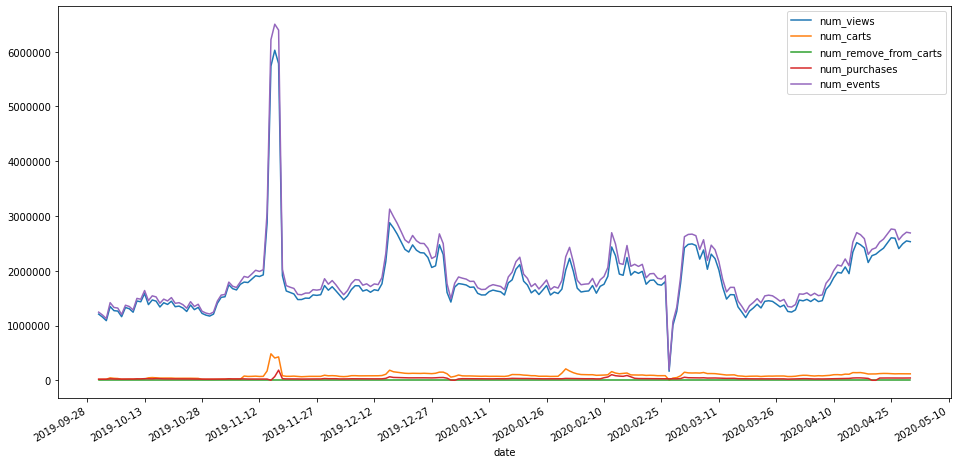

In [5]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
ax = sb.lineplot(data=total_events_df.set_index('date'), dashes=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

As we can see from this graph, the number of daily views began to surge from 13 Nov 2019, and peaked on 16 Nov 2019. The number of cart events also started rising on 13 Nov 2019, and peaked on 15 Nov 2019. The number of purchases peaked on 17 Nov 2019. So I believe there should be a promotion on this ecommerce site on 17 Nov 2019, and users had been preparing for it a fews days ago.
It's also interesting to see that on 27 Feb 2020, there was a sudden drop on the number of view and cart events, and the numbers gradually rose back again after 28 Feb 2020. But the number of purchase events remained quite stable at the same time. I do not have any background knowledge of what this site is and where in the world the site operates. I suspect such sudden drop in the number of events could only be caused by exceptional system behavior (backend server upgrade, system glitch, etc.)

* We then explore event patterns aggregated by months.

In [6]:
columns[-1] = 'month'
reader = MergedDataFrameReader('../output/exploreTotalEvents/eventsAggByMonth.csv', columns)
total_events_df = reader.read_csvs_as_one()
total_events_df[columns[0:-1]] = total_events_df[columns[0:-1]].apply(pd.to_numeric)
total_events_df['month'].apply(pd.to_datetime)
total_events_df['month'] = pd.DatetimeIndex(total_events_df['month'])
total_events_df.head()

,num_views,num_carts,num_remove_from_carts,num_purchases,num_events,month
0,51232669,2885608,0,1200288,55318565,2020-02-01
0,52490785,2641249,0,835007,55967041,2020-01-01
0,62986067,3394763,0,1162048,67542878,2019-12-01
0,63556110,3028930,0,916939,67501979,2019-11-01
0,62353909,3268600,0,966759,66589268,2020-04-01


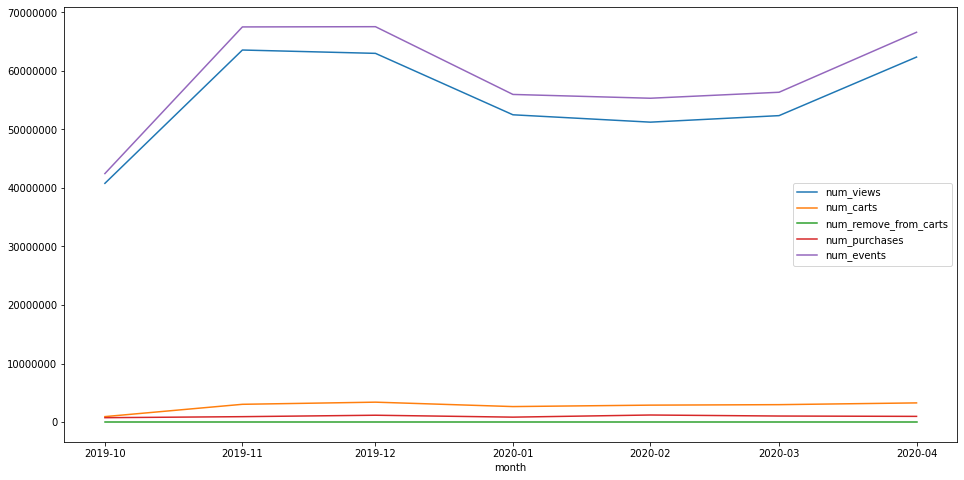

In [7]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
ax = sb.lineplot(data=total_events_df.set_index('month'), dashes=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.ticklabel_format(style='plain', axis='y')
plt.show()

* We also take a look at aggregated event numbers over the 7 months.

In [8]:
reader = MergedDataFrameReader('../output/exploreTotalEvents/eventsAgg.csv', columns[0:-1])
total_events_df = reader.read_csvs_as_one()
total_events_df.head()

,num_views,num_carts,num_remove_from_carts,num_purchases,num_events
0,385746849,19114063,0,6848824,411709736


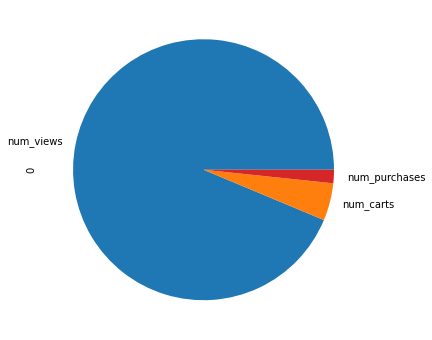

In [9]:
pd.Series(total_events_df.iloc[:,0:-1].iloc[0]).plot.pie(figsize=(12, 6))

The absolute majority of the events came from user views. Among the remaining events, there were more cart events than any others. The number of cart events was more than twice as much as that of purchase events. However, it's surprising to see that there was no remove from cart events at all. I suspect it could be because this site was somehow unable to capture such events to their log.

* Typical daily number of activities? See the distribution

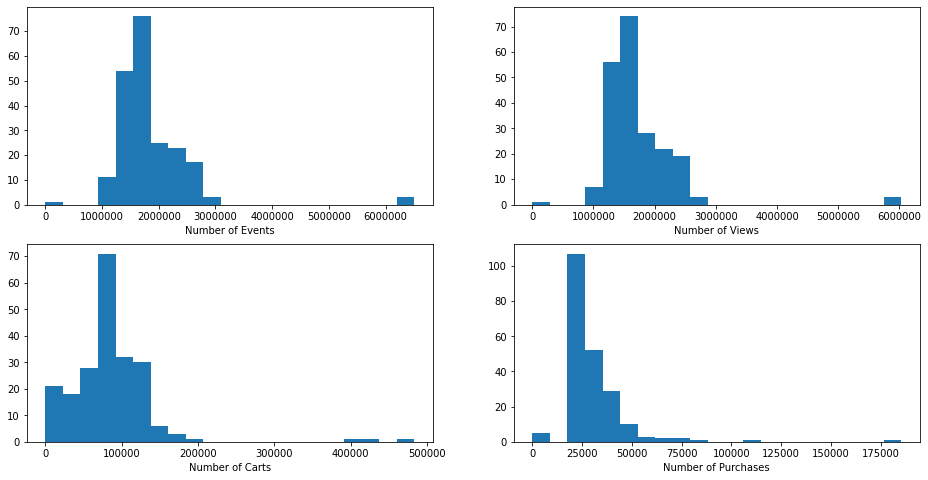

In [10]:
f, axes = plt.subplots(2, 2, figsize=(16, 8))

intervals, counts = HistogramDataPointReader('../output/exploreTotalEvents/totalEventsHist.txt').read()
axes[0,0].hist((intervals[1:] + intervals[:-1]) / 2, bins=len(counts), weights=counts, range=(min(intervals), max(intervals)))
axes[0,0].set_xlabel('Number of Events')
axes[0,0].ticklabel_format(style='plain')

intervals, counts = HistogramDataPointReader('../output/exploreTotalEvents/totalViewsHist.txt').read()
axes[0,1].hist((intervals[1:] + intervals[:-1]) / 2, bins=len(counts), weights=counts, range=(min(intervals), max(intervals)))
axes[0,1].set_xlabel('Number of Views')
axes[0,1].ticklabel_format(style='plain')

intervals, counts = HistogramDataPointReader('../output/exploreTotalEvents/totalCartsHist.txt').read()
axes[1,0].hist((intervals[1:] + intervals[:-1]) / 2, bins=len(counts), weights=counts, range=(min(intervals), max(intervals)))
axes[1,0].set_xlabel('Number of Carts')

intervals, counts = HistogramDataPointReader('../output/exploreTotalEvents/totalPurchasesHist.txt').read()
axes[1,1].hist((intervals[1:] + intervals[:-1]) / 2, bins=len(counts), weights=counts, range=(min(intervals), max(intervals)))
axes[1,1].set_xlabel('Number of Purchases')

plt.show()

* Users generated most events daily

In [11]:
columns = ['user_id', 'num_events']
reader = MergedDataFrameReader('../output/exploreUsersWithMaxEvents/topUserEventPerDayResult.csv', columns)
user_events_df = reader.read_csvs_as_one()
user_events_df.head()

,user_id,num_events
0,569335945,1298
0,569335945,1159
0,572500237,543
0,568466117,500
0,568778435,2386


In [12]:
user_events_df['user_id'].value_counts()

597644399    55
568778435    25
569335945    14
565484478     6
512475445     4
             ..
537873067     1
638783917     1
514649263     1
547199156     1
648264194     1
Name: user_id, Length: 101, dtype: int64

User `597644399` generated the most daily events for 55 days out of the 213-day period.

In [13]:
user_events_df[user_events_df['num_events'] == user_events_df['num_events'].max()]

,user_id,num_events
0,648775038,32363


In [14]:
user_events_df[user_events_df['num_events'] == user_events_df[user_events_df['user_id'] == 597644399]['num_events'].max()]

,user_id,num_events
1,597644399,3503


In [15]:
user_events_df[user_events_df['user_id'] == 648775038]

,user_id,num_events
0,648775038,32363


But `597644399` failed to be a user that produced a record-high number of events. `648775038` once produced 32,363 number of events in a single day, making this user the user who made the highest daily number of events. This is incredible, since 32,363 events means 22.5 events per minute (on average) over the 24-hour period consecutively without rest. If the user slept for 6 hours on that day, the user would need to produce 30 events per minute (on average) during the day, or 1 event per 2 seconds, without taking a break at all. Over the 7-month period, this user only appeared on that site for one day. Therefore, I don't believe this user was a real human. It could be a bot crawling the site😛.

### Turnover & User Spending

* We first explore turnovers by days

In [16]:
columns = ['turnover', 'date']
reader = MergedDataFrameReader('../output/exploreTurnover/turnoverAggByDay.csv', columns)
turnovers_df = reader.read_csvs_as_one()
turnovers_df[columns[0:-1]] = turnovers_df[columns[0:-1]].apply(pd.to_numeric)
turnovers_df['date'].apply(pd.to_datetime)
turnovers_df['date'] = pd.DatetimeIndex(turnovers_df['date'])
turnovers_df.head()

,turnover,date
0,9419655.52,2020-01-23
0,7470344.60,2019-10-24
0,7666737.93,2019-12-14
1,8813543.07,2020-02-25
2,6369797.09,2020-03-29


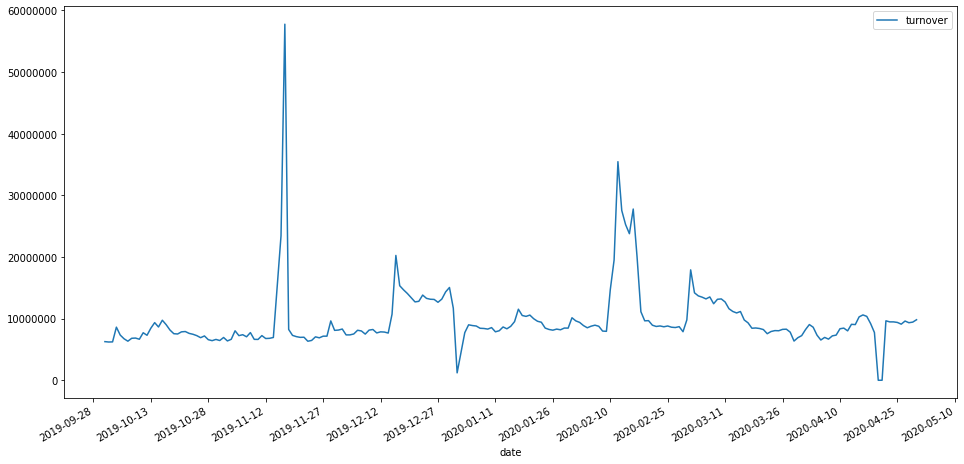

In [17]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
ax = sb.lineplot(data=turnovers_df.set_index('date'), dashes=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Quite unsurprisingly, the day with the highest turnover is the same day on which the number of purchase events peaked (17 Nov 2019). The total turnover of the day was 57,774,481.92 dollars (currency unknown). The day where the suspected system glitch occurred didn't cause purchase events to fluctuate, which should be expected.

* We then explore turnovers aggregated by months.

In [18]:
columns = ['turnover', 'month']
reader = MergedDataFrameReader('../output/exploreTurnover/turnoverAggByMonth.csv', columns)
turnovers_df = reader.read_csvs_as_one()
turnovers_df[columns[0:-1]] = turnovers_df[columns[0:-1]].apply(pd.to_numeric)
turnovers_df['month'].apply(pd.to_datetime)
turnovers_df['month'] = pd.DatetimeIndex(turnovers_df['month'])
turnovers_df.head()

,turnover,month
0,2.445258e+08,2020-04-01
0,2.751949e+08,2019-11-01
0,2.299575e+08,2019-10-01
0,3.213784e+08,2020-03-01
0,3.811789e+08,2020-02-01


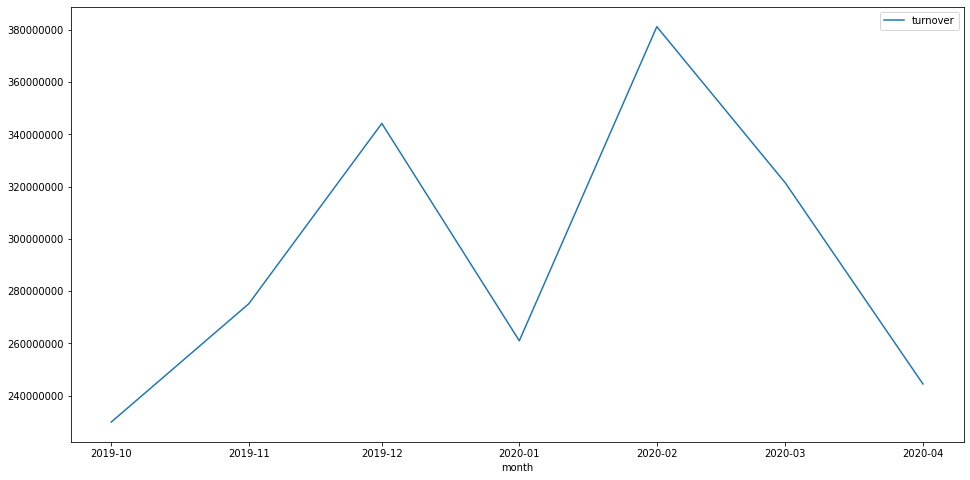

In [19]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
ax = sb.lineplot(data=turnovers_df.set_index('month'), dashes=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.ticklabel_format(style='plain', axis='y')
plt.show()

* Typical daily turnover? See the distribution

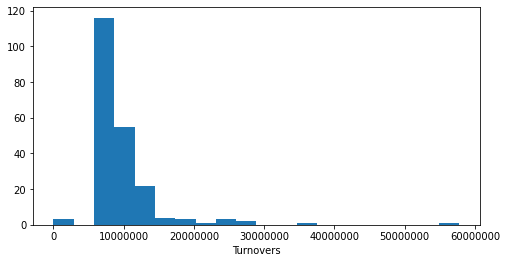

In [20]:
f, axes = plt.subplots(1, 1, figsize=(8, 4))
intervals, counts = HistogramDataPointReader('../output/exploreTurnover/turnoverPerDayHist.txt').read()
plt.hist((intervals[1:] + intervals[:-1]) / 2, bins=len(counts), weights=counts, range=(min(intervals), max(intervals)))
plt.xlabel('Turnovers')
plt.ticklabel_format(style='plain')
plt.show()

* Users spent the most daily

In [21]:
columns = ['user_id', 'spending', 'date']
reader = MergedDataFrameReader('../output/exploreUsersWithMaxSpending/topUserSpendingPerDayResult.csv', columns)
user_spending_df = reader.read_csvs_as_one()
user_spending_df.head()

,user_id,spending,date
0,519451311,36189.24,2020-03-31
0,582007259,56949.41,2020-01-31
0,567260019,37487.48,2019-11-22
1,553431815,116700.64,2019-12-16
0,595104624,33484.06,2020-03-17


In [22]:
user_spending_df['user_id'].value_counts()

595104624    5
553431815    5
513901034    4
602281209    3
569333570    3
            ..
513409449    1
644786087    1
515917884    1
516674469    1
624819201    1
Name: user_id, Length: 175, dtype: int64

Users `595104624` and `553431815` were the only two users that had the most daily spending on this site for 5 days.

In [23]:
user_spending_df[user_spending_df['spending'] == user_spending_df['spending'].max()]

,user_id,spending,date
0,563051763,264440.22,2020-02-12


But neither of `595104624` and `553431815` produced record-high daily spendings. User `563051763` spent 264,440.22 dollars (unknown currency) on this site on 12 Feb 2020. It would be an incredible amount if it was in USD. If it was in JPY, it would be 2456.76 USD (currency exchange rate as of 5 July 2020), which would still be considered an enormous amount of money as a daily spending. Without background knowledge of the ecommerce site, I could only suspect that the user was trying to stock up items for COVID-19😂.

### Popular Products

In [34]:
columns = ['purchase_count', 'product_id', 'rank', 'month']
reader = MergedDataFrameReader('../output/explorePopularProducts/mostPopularProductIdByMonth.csv', columns)
popular_products_df = reader.read_csvs_as_one()
popular_products_df.head()

,purchase_count,product_id,rank,month
0,26230,1005100,1,2020-04
1,22227,1005212,2,2020-04
2,14915,100068488,3,2020-04
3,13932,100068493,4,2020-04
4,12977,1004836,5,2020-04


Ranking of number of purchases by month (Top 50)

In [35]:
popular_products_df = popular_products_df.pivot(columns='month')['product_id']
popular_products_df

month,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
0,1004856,1004856,1004856,1004767,1004767,1005100,1005100
1,1004767,1004767,1004767,1005100,1005115,1005115,1005212
2,1004833,1005115,1005115,1005115,1005100,1004767,100068488
3,1005115,4804056,1005100,1005212,4804056,1005212,100068493
4,4804056,1004833,4804056,4804056,1002544,4804056,1004836
5,1004870,1002544,1002544,1002544,1005212,1002544,1002544
6,1002544,1004870,1004870,1005160,100068488,100068488,1005160
7,1004249,1005100,1005212,1005105,1005160,1004856,4804056
8,1004836,1004249,1004249,1004873,1005105,1005160,1004856
9,1005105,1005105,1005160,1004856,1004856,1005105,1005115


Products that are always the top 50 purchased over the 7-month period

In [42]:
list(
 set(popular_products_df['2019-10'])
.intersection(set(popular_products_df['2019-11']))
.intersection(set(popular_products_df['2019-12']))
.intersection(set(popular_products_df['2020-01']))
.intersection(set(popular_products_df['2020-02']))
.intersection(set(popular_products_df['2020-03']))
.intersection(set(popular_products_df['2020-04']))
)

[1004836,
 1004838,
 1004870,
 4804056,
 1005160,
 1005098,
 1005100,
 5100816,
 1002544,
 1005105,
 1004785,
 1004856,
 1004249,
 1005115,
 1002524,
 1005116,
 1004767]